# IS 455 - Data Visualization
## Programming Assignment 8 - Rashmi Chhabria

In [1]:
# import our usual things
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import contextily as ctx
import ipywidgets

In [2]:
# Reading the Champaign data by actually specifying the coordinate system of our geopandas dataframe in our call to contextily
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

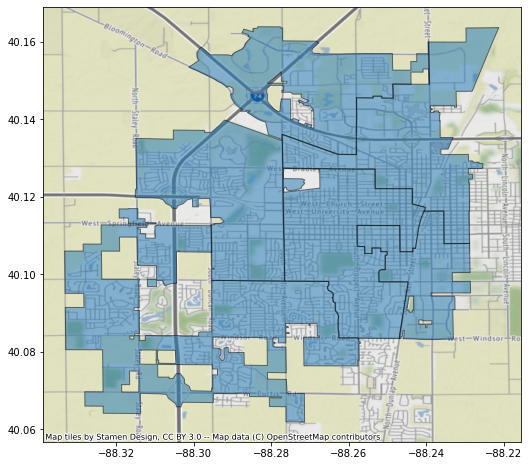

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
# here, you might get an error and can try:
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [4]:
# Adding on some more layers to this map:
gdf_landmark = geopandas.read_file('https://opendata.arcgis.com/datasets/e1a4eebb5c884e6fadbf90821b4b64d4_17.geojson')
gdf_cityprop = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [5]:
gdf_landmark.head()

,OBJECTID,Landmark_Name,Address,Date_Desginated,Ownership,Notes,Type,Council_Bill,Hyperlink1,ShapeSTArea,ShapeSTLength,geometry
0,1,Salem Baptist Church,500 E Park St,8/18/1998,Church Board,None,Building,None,https://cityofchampaign.sharepoint.com/:b:/g/E...,8679.127441,395.278480,"POLYGON ((-88.23175 40.11748, -88.23175 40.117..."
1,2,Lincoln Building,44 Main St,9/17/2002,Dr. Youngerman,None,Building,None,https://cityofchampaign.sharepoint.com/:b:/g/E...,9928.647583,406.438969,"POLYGON ((-88.24153 40.11725, -88.24151 40.117..."
2,3,Solon Building,201 N Market St,9/17/2002,Dr. Youngerman,None,Building,None,https://cityofchampaign.sharepoint.com/:b:/g/E...,1816.504639,206.156367,"POLYGON ((-88.24159 40.11711, -88.24159 40.117..."
3,4,Rick Orr Florist Building,122 N Walnut St,11/18/2003,Jeff Melander,None,Building,None,https://cityofchampaign.sharepoint.com/:b:/g/E...,1611.157104,198.277484,"POLYGON ((-88.24194 40.11702, -88.24221 40.117..."
4,5,Park Theater,126-128 W Church St,8/18/1998,David A Kraft,Currently Art Theater,Building,None,https://cityofchampaign.sharepoint.com/:b:/g/E...,5927.081177,356.579477,"POLYGON ((-88.24459 40.11836, -88.24459 40.118..."


In [6]:
gdf_cityprop.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497803,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800537,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196533,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292847,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671143,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


In [7]:
gdf_landmark['Type'].unique()

array(['Building', 'Historic District', 'Bridge'], dtype=object)

In [8]:
gdf_cityprop['TYPE'].unique()

array(['Boneyard Channel', 'Beardsley Park Plan', 'Parking Deck',
       'Bristol Park Plan', 'Vacant Lot', 'University Rain Garden',
       'Beaver Lake Channel', 'Public Works',
       'Dray Basin East of Salt Dome', 'Fire Station 3',
       'Boneyard/Channel', 'Fire Station 5', 'Sanitary Pump Station',
       'Parkway', 'Park', 'Neighborhood Garden', 'Parking Lot', 'Alley',
       'City Building', 'Police Station', 'Fire Station 1', 'Library',
       'Healey St Basin', 'Fire Station 4', 'Mini park', 'Phinney Branch',
       'Phinney Branch ', 'Fire Station 2', 'Fire Station 6',
       'Parking Lot Leased', 'Public Works Storage',
       'Boneyard Channel Park', 'Bike Path RR', 'North First Street Plan',
       'ROW Green Space', 'Second St Detention Basins',
       'Univeristy Rain Garden', 'Second St Rain Garden',
       'Vacant Lot Burnham', 'Multiuse Path/LAMAR Storage', 'Parkettes',
       'Landfill', 'University Rain Gardne', 'Vacant Field', 'NSP Grant',
       'Boneyard', 'Det

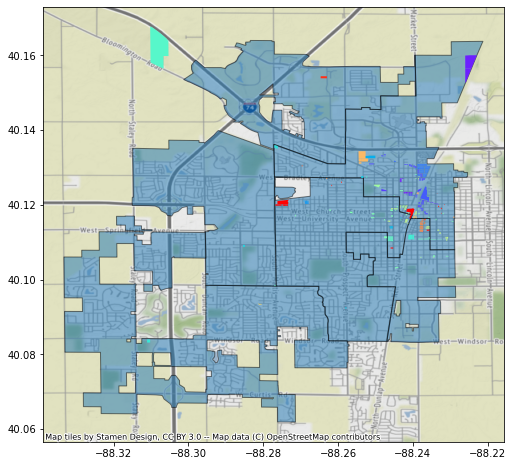

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_landmark.plot(column='Type', ax=ax, cmap='rainbow')
gdf_cityprop.plot(column='TYPE', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

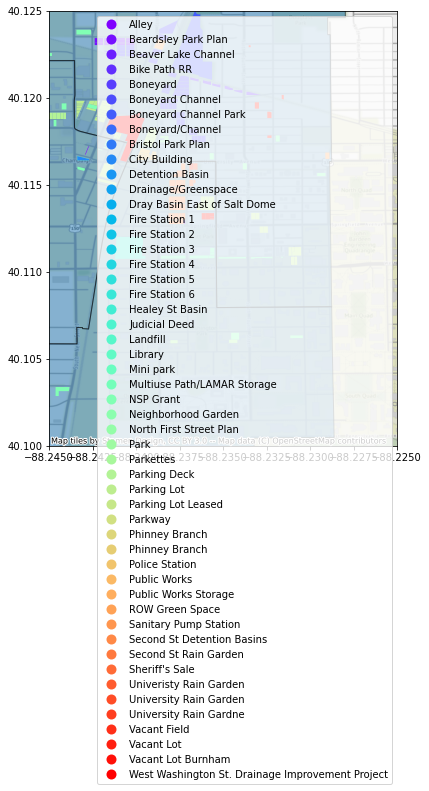

In [10]:
# Zooming into campus town: 
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_landmark.plot(column='Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
gdf_cityprop.plot(column='TYPE', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [11]:
gdf_cityprop.groupby(['TYPE']).count()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
TYPE,,,,,,,,,,,,,,,,
Alley,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Beardsley Park Plan,21,21,11,21,21,21,21,21,21,21,21,21,21,21,21,21
Beaver Lake Channel,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2
Bike Path RR,6,6,0,6,6,6,6,6,6,6,6,6,4,6,6,6
Boneyard,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2
Boneyard Channel,111,106,62,111,111,110,111,111,111,111,111,111,111,111,111,111
Boneyard Channel Park,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Boneyard/Channel,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4
Bristol Park Plan,100,56,64,100,100,100,73,100,100,100,100,100,100,100,100,100


In [12]:
gdf_cityprop = gdf_cityprop[gdf_cityprop['TYPE'].isin(['Boneyard Channel','Bristol Park Plan','Library','Parking Lot','Second St Detention Basins','West Washington St. Drainage Improvement Project'])]

In [13]:
mySelectedLabel = ipywidgets.Label() # start with our label

In [14]:
@ipywidgets.interact(btype=gdf_cityprop['TYPE'].unique())
def my_geopandas_plot(btype):
    gdf_apts_subset = gdf_cityprop.loc[gdf_cityprop['TYPE']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    #ax.set_xlim(-88.245, -88.225)
    #ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apts_subset.plot(column='TYPE', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()
    

interactive(children=(Dropdown(description='btype', options=('Boneyard Channel', 'Bristol Park Plan', 'Parking…

I have reduced the city owned properties to certain types of properties which are amongst the major types in Champaign. The dropdown lets us pick from 5 of these. The map changes and adapts as per the option picked. As for the dashboard part of it. I was unable to add the map into a dashboard as it is a single unit and has not been created using bqplot. I would appreciate if we could discuss how to add anything other than bqplots in a dashboard during class so I am able to do this. All dashboard examples discussed in class were for bqplots.